# **QSAR Model Building of Acetylcholinesterase Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

# Read in data

In [1]:
import pandas as pd

In [3]:
dataset_path = r"C:\Users\Parikshit\Desktop\Final Project for Hack 2 Skill\acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv"
dataset = pd.read_csv(dataset_path)

In [5]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6638,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6639,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6640,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
Y = dataset.iloc[:,-1]
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
6637    4.337242
6638    4.416688
6639    5.767004
6640    5.000000
6641    5.000000
Name: pIC50, Length: 6642, dtype: float64

# Remove low variance features

In [10]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,PubchemFP143,...,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
6638,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
6639,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6640,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X.to_csv('descriptor_list.csv', index = False)

In [13]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use "median" or "most_frequent" if needed
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [31]:
import numpy as np
Y = np.where(np.isnan(Y), np.nanmedian(Y), Y)  # Replace NaN with median
Y = np.where(np.isinf(Y), np.nanmedian(Y), Y)  # Replace infinite values with median


In [33]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8221791585972467

## Model Prediction

In [35]:
Y_pred = model.predict(X)
Y_pred

array([5.65648946, 6.33282629, 5.25684118, ..., 5.59662184, 5.26280846,
       5.23214271])

## Model Performance

In [38]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.43
Coefficient of determination (R^2): 0.82


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [41]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

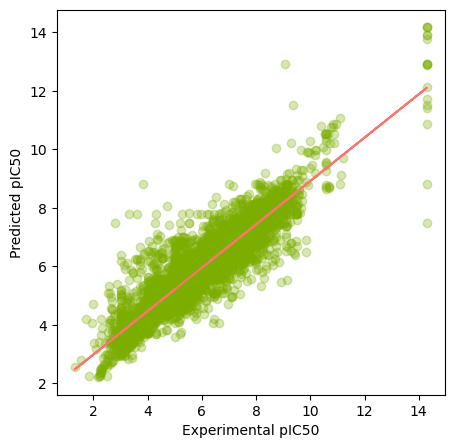

In [42]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [46]:
import pickle

In [48]:
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))

In [1]:
import sklearn
print(sklearn.__version__)


1.2.2


In [3]:
import numpy
import sklearn

print("NumPy Version:", numpy.__version__)
print("Scikit-learn Version:", sklearn.__version__)


NumPy Version: 1.24.3
Scikit-learn Version: 1.2.2


In [5]:
import pickle

model_path = r"C:\Users\Parikshit\Desktop\Final Project for Hack 2 Skill\bioactivity-prediction-app-main\acetylcholinesterase_model.pkl"

with open(model_path, "rb") as f:
    model_data = pickle.load(f)

print(model_data)


RandomForestRegressor(n_estimators=500, random_state=42)


In [7]:
import pickle
import sklearn

model_path = r"C:\Users\Parikshit\Desktop\Final Project for Hack 2 Skill\bioactivity-prediction-app-main\acetylcholinesterase_model.pkl"

with open(model_path, "rb") as f:
    model = pickle.load(f)

print("Current Scikit-learn version:", sklearn.__version__)

if hasattr(model, "_sklearn_version"):
    print("Model was trained on Scikit-learn version:", model._sklearn_version)
else:
    print("Scikit-learn version information is not stored in the model.")


Current Scikit-learn version: 1.2.2
Scikit-learn version information is not stored in the model.
